In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import os
%matplotlib inline

In [2]:
cols=pd.read_csv(os.path.join("StudentPerformanceFactors.csv"),nrows=0).columns
categorical_cols=cols.drop("Hours_Studied").drop("Attendance").drop("Sleep_Hours").\
drop("Previous_Scores").drop("Tutoring_Sessions").drop("Physical_Activity").drop("Exam_Score")
dtypes={col:("category" if col in categorical_cols else "int8") for col in cols   }
student_performance=pd.read_csv(os.path.join("StudentPerformanceFactors.csv"),dtype=dtypes)
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int8    
 1   Attendance                  6607 non-null   int8    
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int8    
 6   Previous_Scores             6607 non-null   int8    
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int8    
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [3]:
#cleaning the data
student_performance["Hours_Studied"].min(),student_performance["Hours_Studied"].max()

(1, 44)

In [4]:
student_performance["Attendance"].min(),student_performance["Attendance"].max()

(60, 100)

In [5]:
student_performance["Parental_Involvement"].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['High', 'Low', 'Medium']

In [6]:
student_performance["Access_to_Resources"].unique()

['High', 'Medium', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']

In [7]:
student_performance["Extracurricular_Activities"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [8]:
student_performance["Sleep_Hours"].min(),student_performance["Sleep_Hours"].max()

(4, 10)

In [9]:
student_performance["Previous_Scores"].min(),student_performance["Previous_Scores"].max()

(50, 100)

In [10]:
student_performance["Motivation_Level"].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['High', 'Low', 'Medium']

In [11]:
student_performance["Internet_Access"].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [12]:
student_performance["Tutoring_Sessions"].min(),\
student_performance["Tutoring_Sessions"].max()

(0, 8)

In [13]:
student_performance["Family_Income"].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['High', 'Low', 'Medium']

In [14]:

student_performance["Teacher_Quality"].unique()

['Medium', 'High', 'Low', NaN]
Categories (3, object): ['High', 'Low', 'Medium']

In [15]:
student_performance["Teacher_Quality"].fillna(method="ffill",inplace=True)

In [16]:
student_performance["School_Type"].unique()

['Public', 'Private']
Categories (2, object): ['Private', 'Public']

In [17]:
student_performance["Peer_Influence"].unique()

['Positive', 'Negative', 'Neutral']
Categories (3, object): ['Negative', 'Neutral', 'Positive']

In [18]:
student_performance["Physical_Activity"].min()\
,student_performance["Physical_Activity"].max()

(0, 6)

In [19]:
student_performance["Learning_Disabilities"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [20]:
student_performance["Parental_Education_Level"].unique()

['High School', 'College', 'Postgraduate', NaN]
Categories (3, object): ['College', 'High School', 'Postgraduate']

In [21]:
student_performance["Parental_Education_Level"].fillna(method="ffill",inplace=True)

In [22]:
student_performance["Distance_from_Home"].unique()

['Near', 'Moderate', 'Far', NaN]
Categories (3, object): ['Far', 'Moderate', 'Near']

In [23]:
student_performance["Distance_from_Home"].fillna(method="ffill",inplace=True)

In [24]:
student_performance["Gender"].unique(),\
student_performance["Exam_Score"].min(),\
student_performance["Exam_Score"].max()

(['Male', 'Female']
 Categories (2, object): ['Female', 'Male'],
 55,
 101)

<Axes: xlabel='Motivation_Level'>

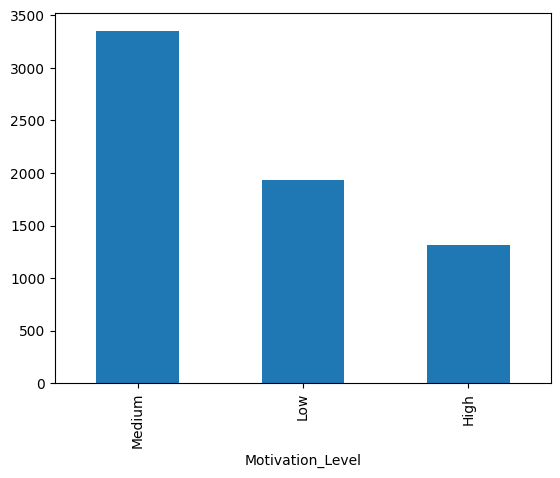

In [25]:
student_performance["Motivation_Level"].value_counts().plot(kind="bar")

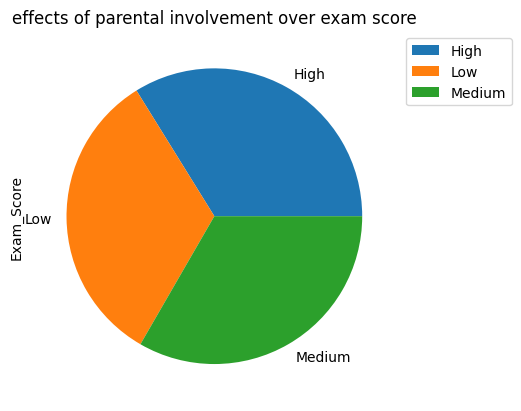

In [26]:
student_performance.groupby("Parental_Involvement")["Exam_Score"].median().plot(kind="pie")
plt.title("effects of parental involvement over exam score")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

<Axes: xlabel='Family_Income'>

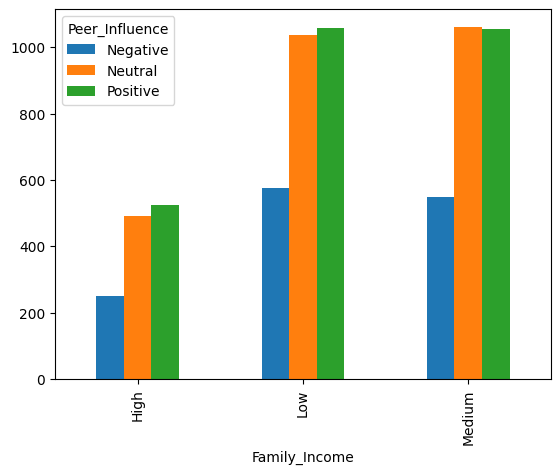

In [27]:
student_performance.groupby(["Family_Income"])\
["Peer_Influence"].value_counts().unstack().plot(kind="bar")

<Axes: xlabel='Gender'>

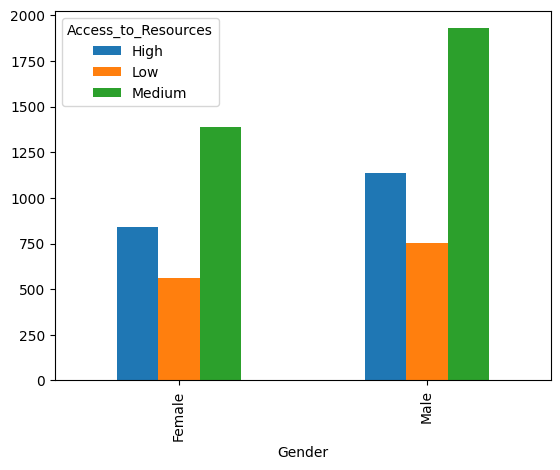

In [28]:
student_performance.groupby("Gender")["Access_to_Resources"]\
.value_counts().unstack().plot(kind="bar")

<Axes: xlabel='Teacher_Quality'>

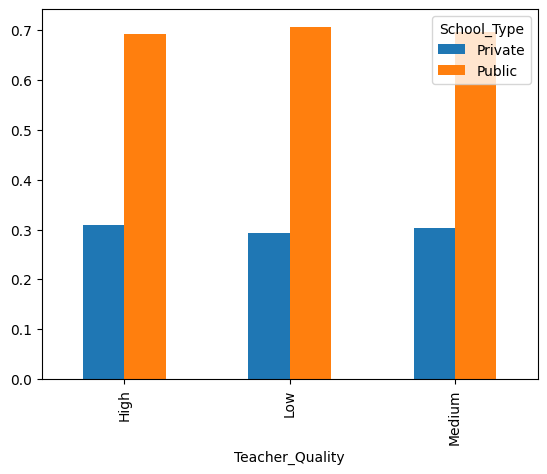

In [29]:
student_performance.groupby("Teacher_Quality")\
["School_Type"].value_counts(normalize=True).unstack().plot(kind="bar")

<Axes: xlabel='Peer_Influence'>

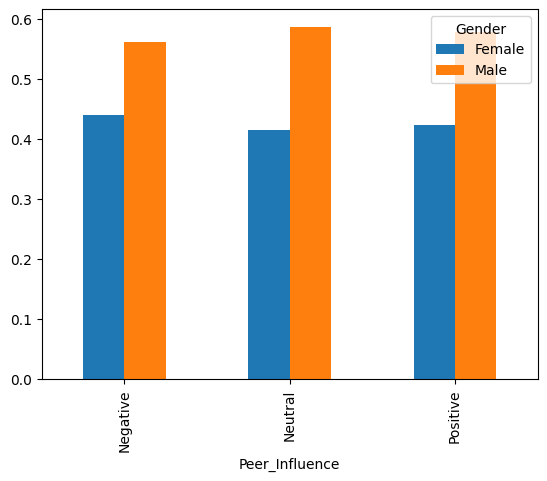

In [30]:
student_performance.groupby("Peer_Influence")["Gender"].\
value_counts(normalize=True).unstack().plot(kind="bar")

In [31]:
pd.cut(student_performance["Sleep_Hours"],10).unique()

[(6.4, 7.0], (7.6, 8.2], (5.8, 6.4], (9.4, 10.0], (8.8, 9.4], (4.6, 5.2], (3.994, 4.6]]
Categories (10, interval[float64, right]): [(3.994, 4.6] < (4.6, 5.2] < (5.2, 5.8] < (5.8, 6.4] ... (7.6, 8.2] < (8.2, 8.8] < (8.8, 9.4] < (9.4, 10.0]]

Text(0.5, 1.0, 'sleep hours frequency among students')

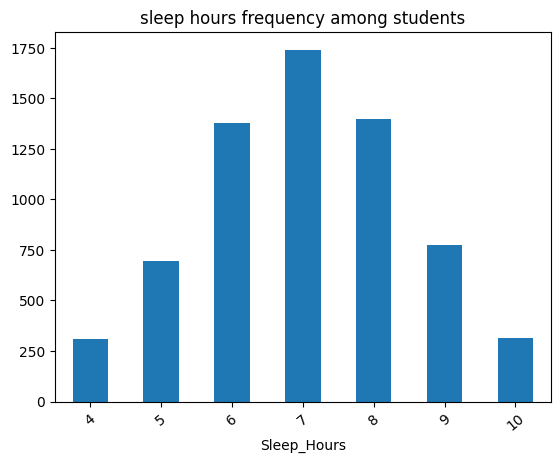

In [32]:
student_performance.groupby(pd.Grouper(key="Sleep_Hours"))\
["Attendance"].count().sort_index().plot(kind="bar")
plt.xticks(rotation=40)
plt.title("sleep hours frequency among students")

Text(0.5, 1.0, 'exam scores median related to attendance hours')

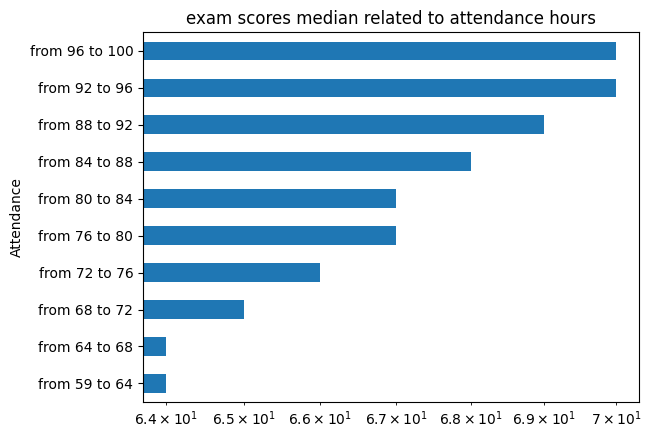

In [33]:
attendance_hours=pd.cut(student_performance["Attendance"],10)
student_performance.groupby(attendance_hours)["Exam_Score"].median().sort_index()\
.plot(kind="barh",logx=True)
plt.yticks(np.arange(len(attendance_hours.unique())),\
[f"from {int(x.left)} to {int(x.right)}" for x in attendance_hours.unique().sort_values()])
plt.title("exam scores median related to attendance hours")

<Axes: xlabel='Gender'>

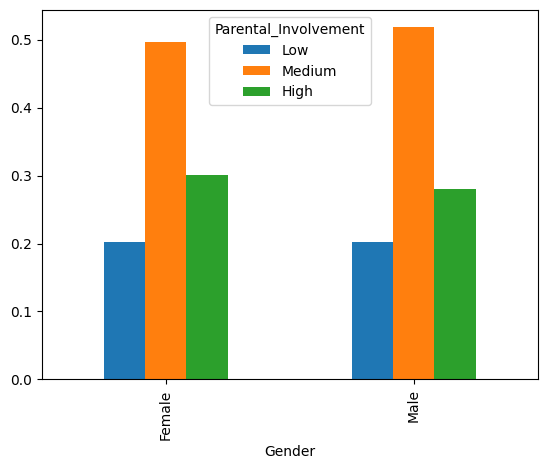

In [34]:
student_performance.groupby("Gender")["Parental_Involvement"]\
.value_counts(normalize=True).unstack()[["Low","Medium","High"]].plot(kind="bar")

Text(0.5, 1.0, 'hours studied relation to exam score')

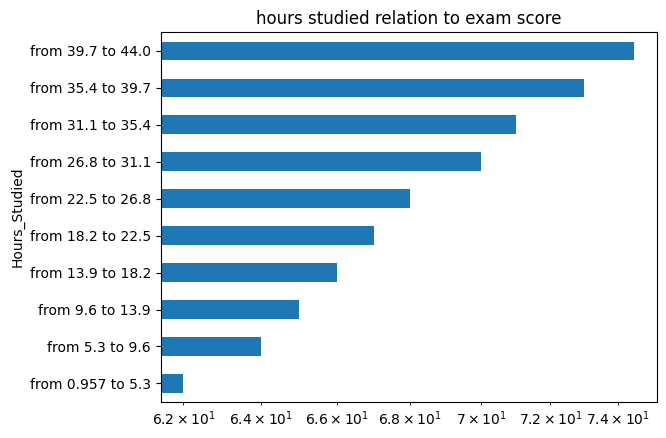

In [35]:
study_hours=pd.cut(student_performance["Hours_Studied"],10)
student_performance.groupby(study_hours)["Exam_Score"].median()\
.sort_index().plot(kind="barh",logx=True)
plt.yticks(np.arange(len(study_hours.unique())),\
[f"from {x.left} to {x.right}" for x in study_hours.unique().sort_values()])
plt.title("hours studied relation to exam score")

<Axes: xlabel='School_Type'>

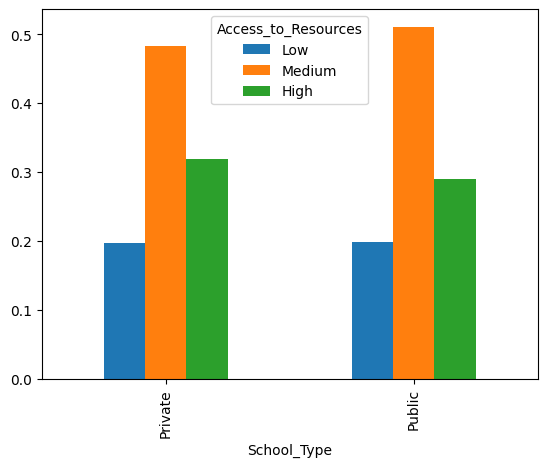

In [39]:
student_performance.groupby("School_Type")["Access_to_Resources"]\
.value_counts(normalize=True).unstack()[["Low","Medium","High"]].plot(kind="bar")

<Axes: xlabel='Gender'>

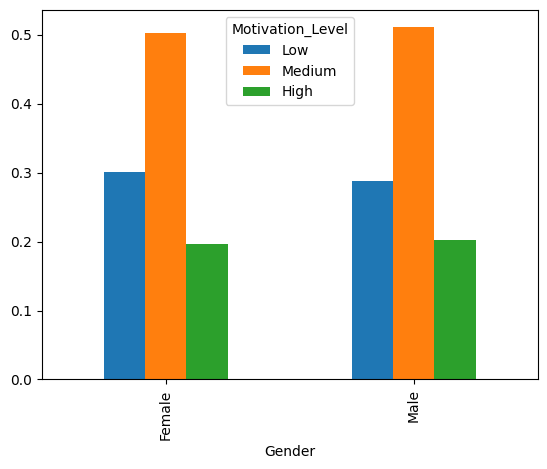

In [46]:
student_performance.groupby("Gender")["Motivation_Level"]\
.value_counts(normalize=True).unstack()[["Low","Medium","High"]].plot(kind="bar")